In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook


#### Interactive surface plots of observable statistics

In [13]:
network_name = '6x6_all-points_redshifts00-01-02-05-10-20-30-40-60-80_train-test-val080-010-010_tanh_Halo_mass_peak-Scale_peak_mass-Halo_growth_rate-Halo_radius-Redshift_to_Stellar_mass-SFR_test_score4.37e-07__fq-ssfr-smf-csfrd-wp_1-1-1-1-1_inertiaStart5_200Explore_new'
iteration = '1-32'

dictionary = pickle.load(open(
    '/home/magnus/trained_networks/backprop_and_pso_trained/real_observations/' + network_name + 
    '/figures_train_weights/train_data/all_losses/surf/iteration_{}.pickle'.format(iteration), 'rb'
))

<IPython.core.display.Javascript object>


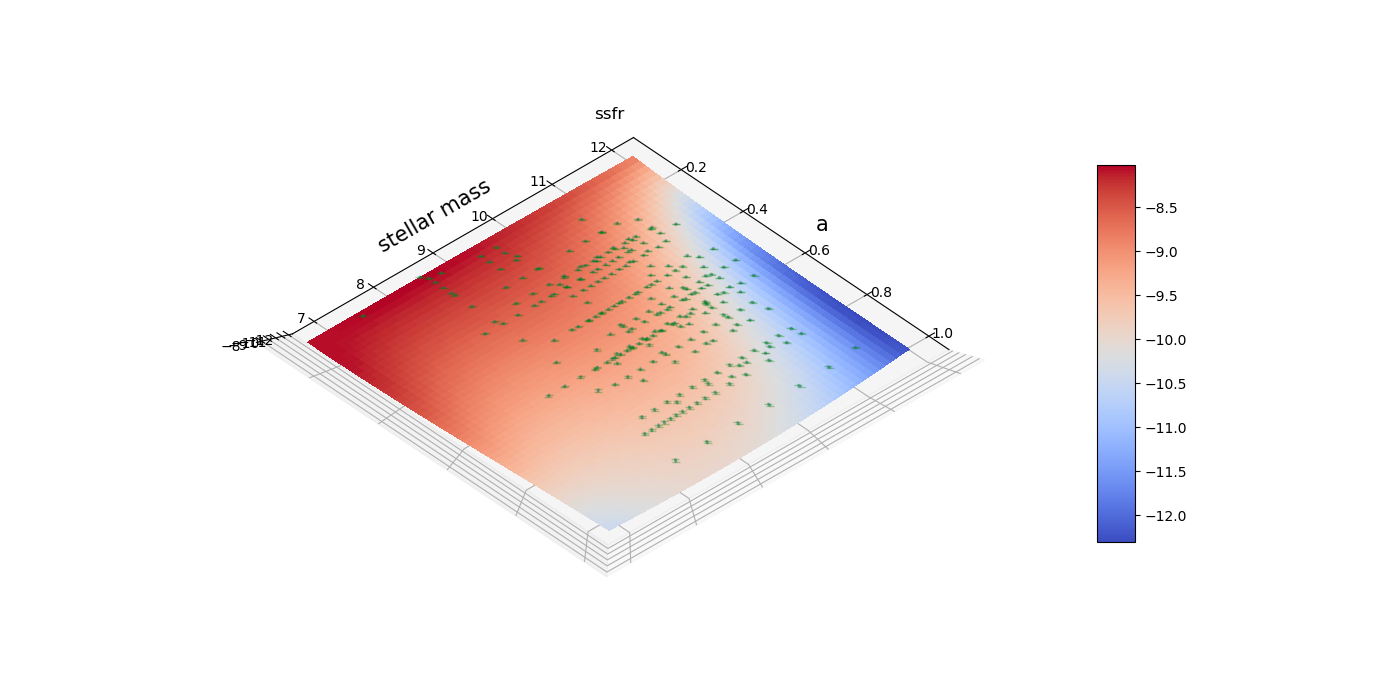

In [15]:
fig = plt.figure(figsize=(14,7))
i_statistic = 0
plot_names = ['ssfr', 'smf', 'fq']
x_label = 'a'
y_label = 'stellar mass'
z_labels = [
    'SSFR',
    'SMF',
    'FQ',
]
ax = plt.subplot(111, projection='3d')

sc = ax.scatter(dictionary['obs_scale_factors'][i_statistic], dictionary['obs_masses'][i_statistic], dictionary['obs_data'][i_statistic], 
             'g', s=3, alpha=0.3)
for i_point in np.arange(0, len(dictionary['obs_data'][i_statistic])):
    ax.plot(
        [dictionary['obs_scale_factors'][i_statistic][i_point], dictionary['obs_scale_factors'][i_statistic][i_point]], 
        [dictionary['obs_masses'][i_statistic][i_point], dictionary['obs_masses'][i_statistic][i_point]], 
        [
            dictionary['obs_data'][i_statistic][i_point]+dictionary['obs_errors'][i_statistic][i_point], 
            dictionary['obs_data'][i_statistic][i_point]-dictionary['obs_errors'][i_statistic][i_point]
        ], 
         'g', marker="_", alpha=0.3
    )
surf = ax.plot_surface(dictionary['scale_factors'][i_statistic], dictionary['masses'][i_statistic], 
                       dictionary['pred_values'][i_statistic], cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)

ax.set_xlabel(x_label, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
if plot_names[i_statistic] == 'fq':
    ax.set_zlim(top=2, bottom=-1)
    ax.set_ylim(bottom=8)
fig.colorbar(surf, shrink=.7, aspect=10)
plt.title(plot_names[i_statistic])
plt.show()